In [2]:
import numpy as np
from IPython.display import Audio
from scipy.signal import lfilter
import matplotlib.pyplot as plt

In [3]:
class drumR:
    def __init__(self, p = .5):
        self.p = p
    def __mul__(self, other):
        if isinstance(other, (int, float, complex)): return other * (-1)**np.random.binomial(1, self.p)
        return other * (-1)**np.random.binomial(1, self.p, len(other))
    def __rmul__(self, other): return self * other

In [28]:
def Karplus_Strong(freq : float, dur : float, fs : float, S : float, b, R = 1, dist = 'unif') -> np.array:
    
    N = int(np.round(fs/freq - 1/(2 * S), 0))
    samples = np.zeros(int(np.round(fs * dur, 0)))

    try: samples[ : N] = (2 * np.random.randint(0, 2, N) - 1).astype(float)
    except ValueError: return samples
    
    for i in range(N):
        samples[i] = (samples[i] + samples[i - 1])/2 * R * (-1)**np.random.binomial(1, 1 - b)

    for i in range(N, N * (1 + samples.size//N), N):
        size = min(N, samples.size - i)

        t1 = samples[i - N : i - N + size]
        if i == N: t2 = np.concatenate(([0], samples[i - N : i - N - 1 + size]))
        else: t2 =  samples[i - N - 1 : i - N - 1 + size]

        samples[i : i + N] = R * (t1 / S + t2 * (2 - 1/S)) / 2 * (-1)**np.random.binomial(1, 1 - b, size)

    return samples

In [99]:
def Karplus_Strong_Z(freq : float, dur : float, fs : float, S : float, b, R = 1, dist = 'unif') -> np.array:
    N = int(np.round(fs/freq - 1/(2 * S), 0))
    
    x = np.zeros(int(np.round(fs * dur, 0)))
    try:
        if dist == 'unif': x[ : N] = (2 * np.random.randint(0, 2, N) - 1).astype(float)
        else: x[ :N] = np.random.normal(0, 10, N)
    except ValueError: return x
        
    factor = 2 * b - 1
    b_filt = [factor, factor]
    a_filt = np.zeros(N + 2)
    k1 = R * -factor * (2 - 1 / S)
    k2 = R * -factor * (1 / S)
    a_filt[[0, -2, -1]] = [2, k1, k2]
    
    
    return lfilter(b_filt, a_filt, x)

In [105]:
fs = 18000
freq = 1000
dur = 10
b = 1
S = 20

sound = Karplus_Strong_Z(freq = freq, dur = dur, fs = fs, S = S, b = b, R = 1)
Audio(sound, rate = fs)

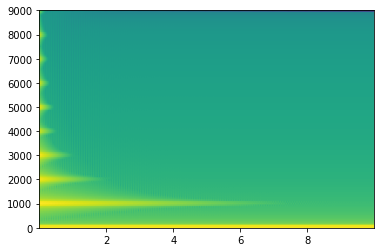

In [106]:
plt.specgram(Karplus_Strong_Z(freq = freq, dur = dur, fs = fs, S = S, b = b, R = 1), Fs = fs);

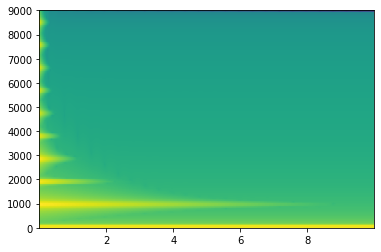

In [107]:
plt.specgram(Karplus_Strong(freq = freq, dur = dur, fs = fs, S = S, R = 1, b = b), Fs = fs);

In [36]:
Audio(sound, rate = fs)

In [37]:
Audio(Karplus_Strong(freq = freq, dur = dur, fs = fs, S = S, R = 1, b = b), rate = fs)

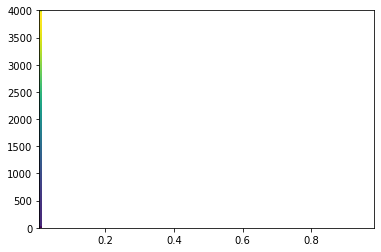

In [683]:
plt.specgram(sound, Fs = fs);